In [1]:
import pandas as pd
import matplotlib.pyplot as plt

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [2]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates()
    # df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size"])
    return df
    

In [3]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df, poe_df])

In [18]:
pythia_df = df[df['checkpoint'].str.startswith("EleutherAI")]
pythia_df[pythia_df['checkpoint'] == "EleutherAI/pythia-70m-deduped"]
# select rows there method is process of elimination, and data is cqa
pythia_df[(pythia_df["method"] == "process_of_elimination") & (pythia_df["checkpoint"] == "EleutherAI/pythia-70m-deduped")]

,checkpoint,dataset,method,accuracy
12,EleutherAI/pythia-70m-deduped,cqa,process_of_elimination,0.2080
13,EleutherAI/pythia-70m-deduped,copa,process_of_elimination,0.4740
14,EleutherAI/pythia-70m-deduped,obqa,process_of_elimination,0.2420
15,EleutherAI/pythia-70m-deduped,piqa,process_of_elimination,0.4853
16,EleutherAI/pythia-70m-deduped,siqa,process_of_elimination,0.3265
17,EleutherAI/pythia-70m-deduped,winogrande,process_of_elimination,0.5059
36,EleutherAI/pythia-70m-deduped,cqa,process_of_elimination,0.2162
37,EleutherAI/pythia-70m-deduped,copa,process_of_elimination,0.4840
38,EleutherAI/pythia-70m-deduped,obqa,process_of_elimination,0.3140
39,EleutherAI/pythia-70m-deduped,piqa,process_of_elimination,0.4924


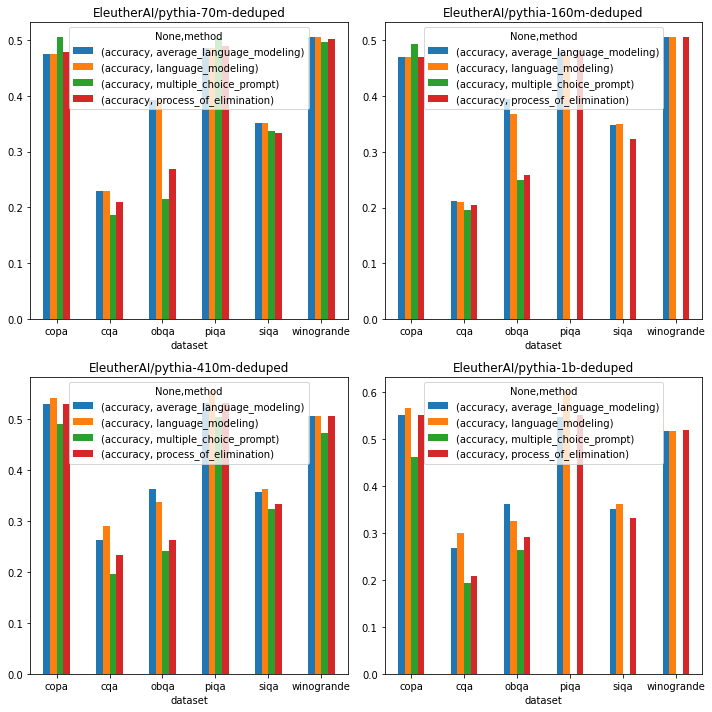

In [4]:
# to do
# 2. (optional) plot confidence interval
# plot the results, grouped by dataset and method, with title and x/y labels
# df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, figsize=(10, 5))

checkpoints = ["EleutherAI/pythia-70m-deduped", "EleutherAI/pythia-160m-deduped", "EleutherAI/pythia-410m-deduped", "EleutherAI/pythia-1b-deduped"]
# creating subplots for four models
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, checkpoint in enumerate(checkpoints):
    df_vis = df[df["checkpoint"] == checkpoint]
    df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, ax=axes[i//2][i%2], title=checkpoint)
    plt.tight_layout()

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# for i, checkpoint in enumerate(checkpoints):
#     df_vis = df[df["checkpoint"] == checkpoint]
#     df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, ax=axes[i])
#     axes[i].set_title(checkpoint)
#     axes[i].set_xlabel("Dataset")
#     axes[i].set_ylabel("Accuracy")
